# 稀疏核主成分分析 (Sparse Principal Component Analysis)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from tqdm.notebook import tqdm
from random import choices

# MNIST Dataset

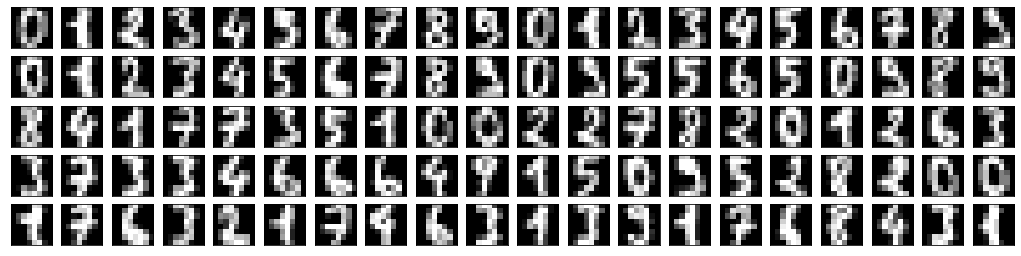

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
x=digits.data/16
y=digits.target
N=len(y)
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
for i in range(100):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show() 

# PCA

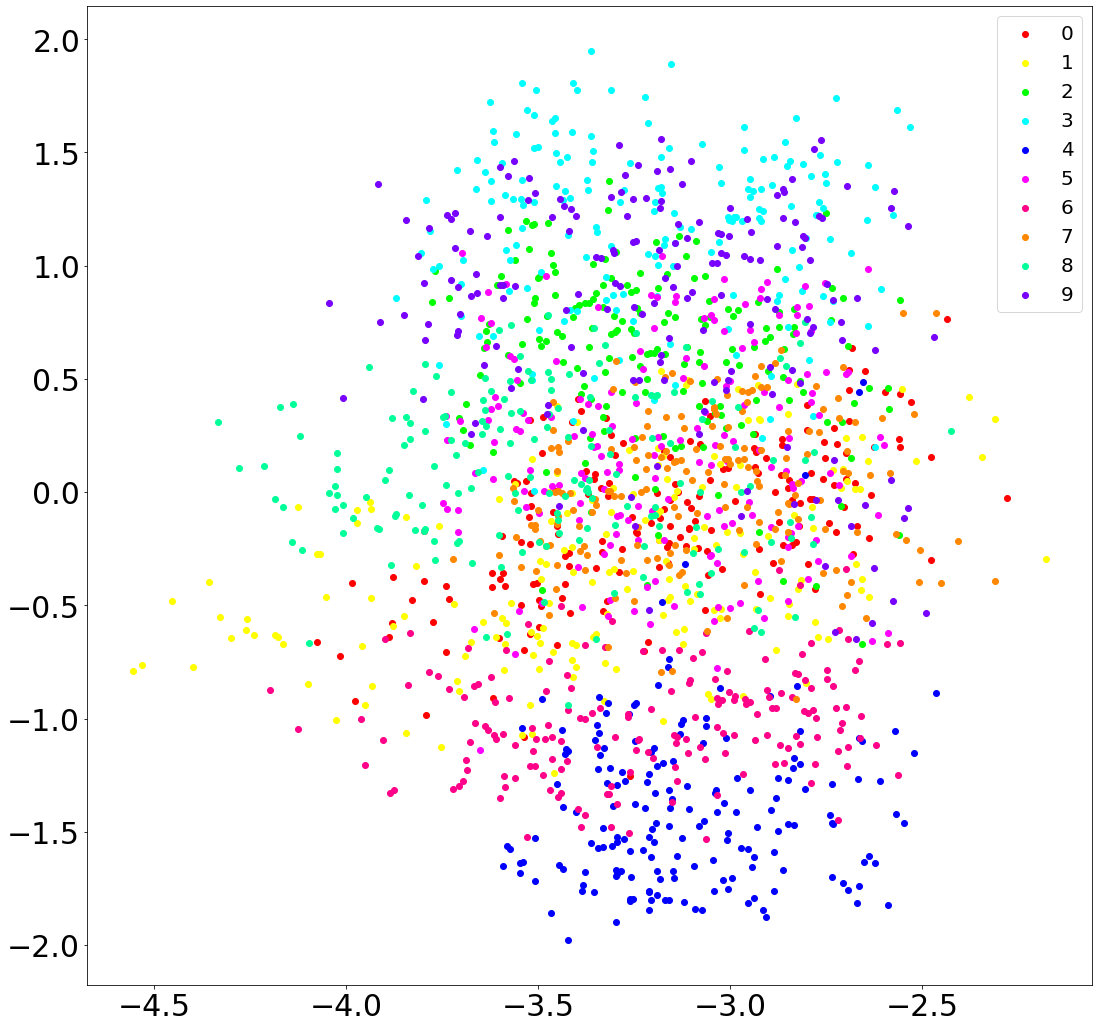

In [3]:
S=np.dot(x.T,x)/N
w,v=np.linalg.eig(S)
new_x=np.dot(x,v[:,:2])
color=["#FF0000","#FFFF00","#00FF00","#00FFFF","#0000FF",
       "#FF00FF","#FF0088","#FF8800","#00FF99","#7700FF"]
plt.rcParams["figure.figsize"] = (18,18)
for i in range(0,10):
    BOOL=(y==i)
    plt.scatter(new_x[BOOL,0],new_x[BOOL,1],c=color[i],label=i)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=20)
plt.show()

# Sparse PCA

In [4]:
B=np.zeros((64,2))
L1=np.ones(64)*10
A=np.zeros((64,2))
A[:32,0],A[32:,0]=np.ones(32)/64,-np.ones(32)/64
A[:32,1],A[32:,1]=-np.ones(32)/64,np.ones(32)/64
for k in tqdm(range(50)):
    for t in range(0,9000):
        grad=-2*np.dot(x.T,np.dot(x,A-B))+2*B+np.sign(B)*L1[:,None]
        B-=0.00003*grad
    CC=np.dot(np.dot(x.T,x),B)
    U,D,V=np.linalg.svd(CC,full_matrices=False)
    A=np.dot(U,V.T)
C=np.zeros((64,2))
for i in range(0,2):
    C[:,i]=B[:,i]/sum(abs(B[:,i]))

# Plot Result

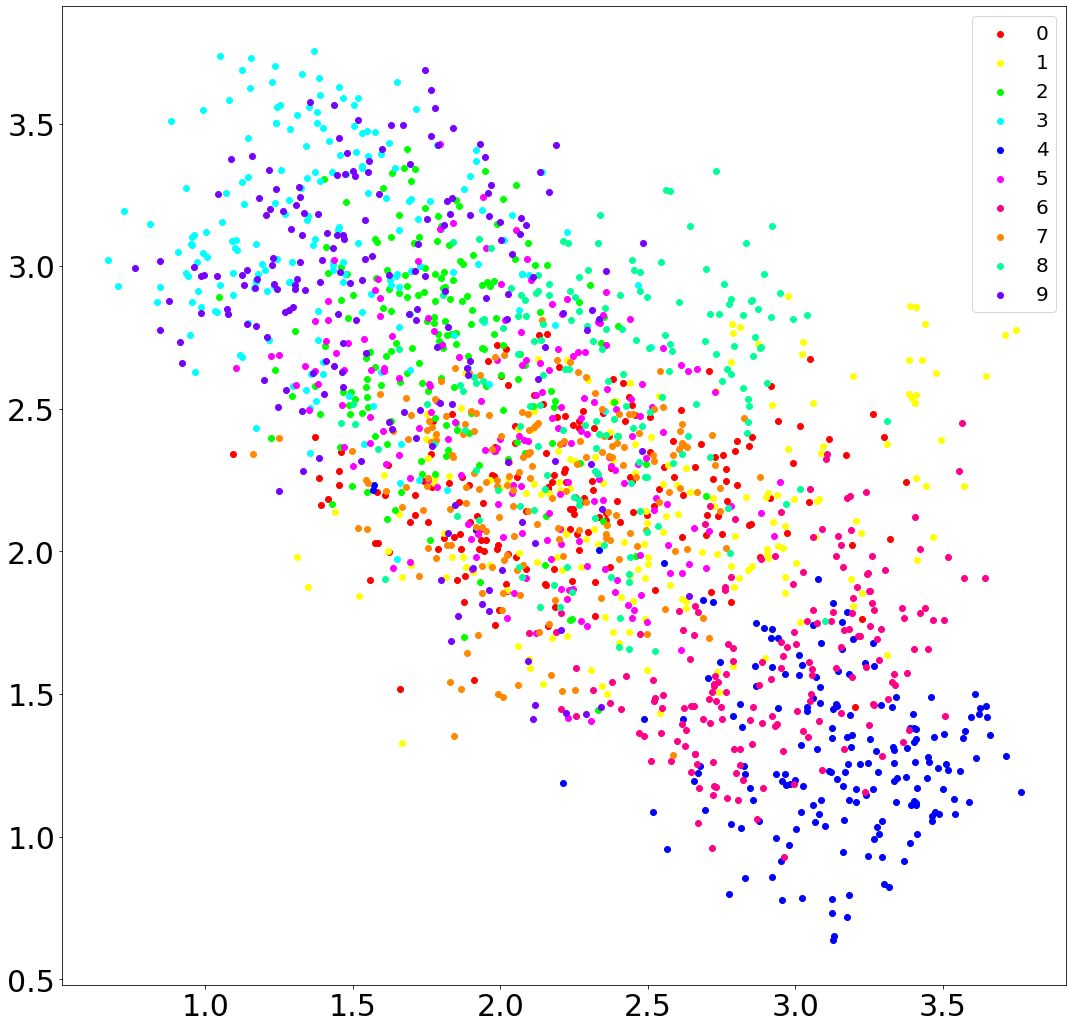

In [5]:
color=["#FF0000","#FFFF00","#00FF00","#00FFFF","#0000FF",
       "#FF00FF","#FF0088","#FF8800","#00FF99","#7700FF"]
plt.rcParams["figure.figsize"] = (18,18)
new_x=np.dot(x,B)
for i in range(0,10):
    BOOL=(y==i)
    plt.scatter(new_x[BOOL,0],new_x[BOOL,1],c=color[i],label=i)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=20)
plt.show()